In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
import problema1.src.preprocessing as prepro
import problema1.src.data_handler as data_handler
from problema1.src.models import LogisticRegression
from IPython.display import display

project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

cell_diagnosis_dev : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_dev_imbalanced : pd.DataFrame = pd.read_csv(f'{project_root}/TP02/problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')

1.1565176427496657


# 1 )

## 1.1 )

In [2]:
cell_diagnosis_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1333 non-null   float64
 1   CellShape            1347 non-null   float64
 2   NucleusDensity       1362 non-null   float64
 3   ChromatinTexture     1366 non-null   float64
 4   CytoplasmSize        1347 non-null   float64
 5   CellAdhesion         1369 non-null   float64
 6   MitosisRate          1343 non-null   float64
 7   NuclearMembrane      1343 non-null   float64
 8   GrowthFactor         1359 non-null   float64
 9   OxygenSaturation     1375 non-null   float64
 10  Vascularization      1347 non-null   float64
 11  InflammationMarkers  1358 non-null   float64
 12  Diagnosis            1663 non-null   float64
 13  CellType             1407 non-null   object 
 14  GeneticMutation      1663 non-null   object 
dtypes: float64(13), object(2)
memory usage

In [3]:
print(cell_diagnosis_dev['GeneticMutation'].value_counts()['Presnt'] + cell_diagnosis_dev['GeneticMutation'].value_counts()['Absnt'])
### En la feature GeneticMutation:
###     #Ocurrencias de 'Presnt' + #Ocurrencias de 'Absnt'
###     OUTPUT = 1663
### El output es igual al número de muestras, por lo tanto no hay valores desconocidos para la feature 'GeneticMutation'

1663


In [4]:
cell_diagnosis_dev_processed = prepro.correct_data_types(cell_diagnosis_dev)
cell_diagnosis_dev_processed = prepro.fill_na_values(cell_diagnosis_dev_processed)
cell_diagnosis_dev_processed = prepro.one_hot_encoding(cell_diagnosis_dev_processed, 'CellType')
cell_diagnosis_dev_processed.to_csv(f'{project_root}/TP02/problema1/data/processed/cell_diagnosis_dev_processed.csv', index=False)
cell_diagnosis_dev_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CellSize             1663 non-null   Float64
 1   CellShape            1663 non-null   Float64
 2   NucleusDensity       1663 non-null   Float64
 3   ChromatinTexture     1663 non-null   Float64
 4   CytoplasmSize        1663 non-null   Float64
 5   CellAdhesion         1663 non-null   Float64
 6   MitosisRate          1663 non-null   Float64
 7   NuclearMembrane      1663 non-null   Float64
 8   GrowthFactor         1663 non-null   Float64
 9   OxygenSaturation     1663 non-null   Float64
 10  Vascularization      1663 non-null   Float64
 11  InflammationMarkers  1663 non-null   Float64
 12  Diagnosis            1663 non-null   bool   
 13  GeneticMutation      1663 non-null   bool   
 14  CellType_Epthlial    1663 non-null   bool   
 15  CellType_Mesnchymal  1663 non-null   b

In [5]:
display(cell_diagnosis_dev_processed.head())
print("")
display(cell_diagnosis_dev_processed.describe())
display(cell_diagnosis_dev_processed.describe(include=["bool"]))

,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
0,63.423148,0.500594,1.473261,23.300222,28.448318,0.477657,3.434832,2.492852,-10.0,78.625935,5.727217,41.158399,False,False,True,False,False
1,72.906362,0.474808,1.36136,21.336137,29.856233,0.481035,2.702433,2.281137,63.084699,79.987328,5.319552,40.859154,True,True,True,False,False
2,70.711969,0.481701,1.445035,21.521406,30.582427,0.472651,2.786606,2.318029,61.347022,79.987328,5.068099,40.859154,True,False,False,False,True
3,73.210206,0.498832,1.427612,22.437077,29.88797,0.439511,2.99838,2.149232,64.047169,80.693058,5.068099,37.843069,True,True,False,True,False
4,68.348288,0.498832,1.454116,21.150723,28.328197,0.474836,2.987601,2.414464,62.197197,81.73799,4.347438,43.444881,True,True,True,False,False


,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers
count,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0
mean,80.559708,0.579689,1.979277,25.375571,32.936831,0.535724,4.894256,2.746298,71.725743,90.911299,5.797016,46.466559
std,89.969314,0.510358,4.520376,22.566185,29.606227,0.556165,10.436527,2.42976,70.526273,75.24606,5.096413,39.967576
min,-100.0,-1.413038,-3.0,10.0,5.0,-4.461755,-50.0,-3.43899,-50.0,-10.0,-0.997057,0.0
25%,67.314449,0.484957,1.405752,21.481689,26.826557,0.461483,2.826156,2.287843,58.863315,79.357764,4.85981,38.148935
50%,69.704323,0.498832,1.445035,22.06681,28.448318,0.474836,3.080247,2.414464,60.993969,79.987328,5.068099,40.859154
75%,71.846171,0.516412,1.476913,22.630336,30.090473,0.489936,3.365578,2.506261,62.515962,80.748008,5.269535,43.247037
max,1000.0,5.048566,50.0,263.793425,299.350559,5.029925,100.0,24.871762,563.622684,807.181058,54.512433,440.902261


,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
count,1663,1663,1663,1663,1663
unique,2,2,2,2,2
top,False,True,False,False,False
freq,914,848,1172,1230,924


In [6]:
cell_diagnosis_dev_processed_and_standardized : pd.DataFrame = prepro.standardize_numeric_columns(cell_diagnosis_dev_processed)
cell_diagnosis_dev_processed_and_standardized.to_csv(f'{project_root}/TP02/problema1/data/processed/cell_diagnosis_dev_processed_and_standardized.csv', index=False)
display(cell_diagnosis_dev_processed_and_standardized.head())
print("")
display(cell_diagnosis_dev_processed_and_standardized.describe())

,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers,Diagnosis,GeneticMutation,CellType_Epthlial,CellType_Mesnchymal,CellType_Unknown
0,-0.190471,-0.154978,-0.111941,-0.091967,-0.151607,-0.104406,-0.139838,-0.104309,-1.158799,-0.163269,-0.013696,-0.132812,False,False,True,False,False
1,-0.085066,-0.205505,-0.136696,-0.179004,-0.104052,-0.098332,-0.210015,-0.191443,-0.122522,-0.145177,-0.093686,-0.140299,True,True,True,False,False
2,-0.109457,-0.191998,-0.118185,-0.170794,-0.079524,-0.113407,-0.201949,-0.17626,-0.147161,-0.145177,-0.143026,-0.140299,True,False,False,False,True
3,-0.081689,-0.158431,-0.12204,-0.130217,-0.10298,-0.172993,-0.181658,-0.24573,-0.108875,-0.135798,-0.143026,-0.215762,True,True,False,True,False
4,-0.135729,-0.158431,-0.116177,-0.18722,-0.155664,-0.109479,-0.18269,-0.136571,-0.135106,-0.121911,-0.284431,-0.075603,True,True,True,False,False


,CellSize,CellShape,NucleusDensity,ChromatinTexture,CytoplasmSize,CellAdhesion,MitosisRate,NuclearMembrane,GrowthFactor,OxygenSaturation,Vascularization,InflammationMarkers
count,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0,1663.0
mean,-0.0,0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,0.0,0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-2.006903,-3.904566,-1.101518,-0.681354,-0.943613,-8.985609,-5.25982,-2.545638,-1.725963,-1.341084,-1.333109,-1.162606
25%,-0.14722,-0.185617,-0.126876,-0.172554,-0.206385,-0.133487,-0.19816,-0.188683,-0.182378,-0.153543,-0.183895,-0.208109
50%,-0.120657,-0.158431,-0.118185,-0.146625,-0.151607,-0.109479,-0.173813,-0.136571,-0.152167,-0.145177,-0.143026,-0.140299
75%,-0.09685,-0.123984,-0.111133,-0.121653,-0.096141,-0.082328,-0.146474,-0.09879,-0.130587,-0.135067,-0.103501,-0.080553
max,10.219488,8.756354,10.62317,10.565271,8.998571,8.080702,9.112777,9.106029,6.974662,9.519033,9.558766,9.868892


## 1.2 )

In [7]:
train : pd.DataFrame
validation : pd.DataFrame
train, validation = data_handler.get_train_and_validation_sets(cell_diagnosis_dev_processed_and_standardized, train_fraction=0.8, seed=42)

print("Cantidad de muestras del set de entrenamiento: ", train.shape[0])
print("Cantidad de muestras del set de validación:    ", validation.shape[0])

Cantidad de muestras del set de entrenamiento:  1330
Cantidad de muestras del set de validación:     333


In [8]:
log_reg : LogisticRegression = LogisticRegression(train.drop(columns=['Diagnosis']).to_numpy(), train['Diagnosis'].to_numpy(), L2 = 1)
log_reg.fit_gradient_descent(step_size=0.001, tolerance=0.001)

In [9]:
log_reg.predict(validation.drop(columns=['Diagnosis']).to_numpy())
log_reg.evaluate(validation['Diagnosis'].to_numpy())
tp, tn, fp, fn = log_reg.get_confusion_matrix()
print("TP: ", tp)
print("TN: ", tn)
print("FP: ", fp)
print("FN: ", fn)
print("")
print("ACCURACY             : ", log_reg.get_accuracy())
print("PRECISION            : ", log_reg.get_precision())
print("RECALL               : ", log_reg.get_recall())
print("FALSE POSITIVE RATE  : ", log_reg.get_false_positive_rate())
print("F-SCORE              : ", log_reg.get_f_score())

TP:  108
TN:  167
FP:  16
FN:  42

ACCURACY             :  0.8258258258258259
PRECISION            :  0.8709677419354839
RECALL               :  0.72
FALSE POSITIVE RATE  :  0.08743169398907104
F-SCORE              :  0.7883211678832117


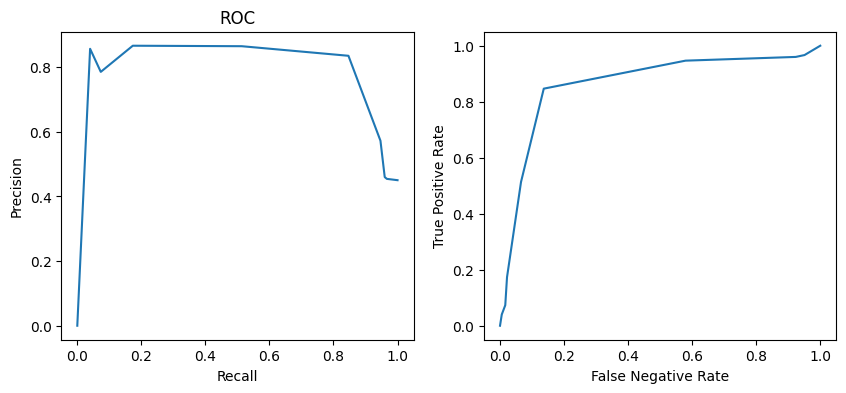

In [10]:
recalls : list[float] = []
precisions : list[float] = []
falses_negatives_rateses : list[float] = []
for threshold in np.linspace(0, 1, 10):
    log_reg.evaluate(validation['Diagnosis'].to_numpy(), threshold=threshold)
    recalls.append(log_reg.get_recall())
    precisions.append(log_reg.get_precision())
    falses_negatives_rateses.append(log_reg.get_false_positive_rate())
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.title("Precision-Recall (PR)")
plt.plot(recalls, precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("ROC")
plt.subplot(1, 2, 2)
plt.plot(falses_negatives_rateses, recalls)
plt.xlabel("False Negative Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [ ]:
Ls : np.ndarray = np.arange(0, 10, 0.5)
F_models : dict = {f'gradient_L2_{l}' : [] for l in Ls}
for i in range(1, 6):
    train : pd.DataFrame
    validation : pd.DataFrame
    validation = cell_diagnosis_dev.iloc[(i*332) - 332 : (i*332)]
    train = cell_diagnosis_dev.drop(cell_diagnosis_dev.index[(i*332) - 332 : (i*332)])
    validation_processed = prepro.correct_data_types(validation)
    validation_processed = prepro.fill_na_values(validation_processed) 
    validation_processed = prepro.one_hot_encoding(validation_processed, 'CellType')
    validation_processed_and_standardized : pd.DataFrame = prepro.standardize_numeric_columns(validation_processed)
    train_processed = prepro.correct_data_types(train)
    train_processed = prepro.fill_na_values(train_processed) 
    train_processed = prepro.one_hot_encoding(train_processed, 'CellType')
    train_processed_and_standardized : pd.DataFrame = prepro.standardize_numeric_columns(train_processed)
    print(len(train_processed_and_standardized) + len(validation_processed_and_standardized))
    for l in Ls:
        lin_grad_L2 : LogisticRegression = LogisticRegression(train_processed_and_standardized.drop(columns='Diagnosis').to_numpy(), train_processed_and_standardized['Diagnosis'].to_numpy(), L2=l)
        lin_grad_L2.fit_gradient_descent(step_size=0.001, tolerance=0.001)
        lin_grad_L2.predict(validation_processed_and_standardized.drop(columns=['Diagnosis']).to_numpy())
        lin_grad_L2.evaluate(validation_processed_and_standardized['Diagnosis'].to_numpy())
        F_models[f'gradient_L2_{l}'].append(
            lin_grad_L2.get_f_score()
        )
print(F_models)

1663
1663
1663
1663
1663
{'gradient_L2_0.0': [0.7905138339920948, 0.8736462093862816, 0.8543689320388349, 0.743859649122807, 0.8417721518987342], 'gradient_L2_0.5': [0.776, 0.8695652173913043, 0.8448844884488449, 0.7032967032967034, 0.7906976744186046], 'gradient_L2_1.0': [0.7540983606557377, 0.8695652173913043, 0.8282828282828283, 0.6816479400749064, 0.7422680412371134], 'gradient_L2_1.5': [0.743801652892562, 0.8529411764705882, 0.7902097902097902, 0.6538461538461539, 0.7183098591549296], 'gradient_L2_2.0': [0.7172995780590717, 0.8432835820895522, 0.7642857142857142, 0.6215139442231076, 0.7050359712230215], 'gradient_L2_2.5': [0.7008547008547008, 0.8389513108614233, 0.7418181818181818, 0.5819672131147541, 0.6813186813186813], 'gradient_L2_3.0': [0.6952789699570815, 0.8345864661654135, 0.706766917293233, 0.5583333333333333, 0.651685393258427], 'gradient_L2_3.5': [0.6754385964912281, 0.8345864661654135, 0.6870229007633588, 0.5485232067510548, 0.6387832699619772], 'gradient_L2_4.0': [0.6

In [12]:
print("MODEL              BCE")
print(pd.DataFrame(F_models).mean())

MODEL              BCE
gradient_L2_0.0    0.820832
gradient_L2_0.5    0.796889
gradient_L2_1.0    0.775172
gradient_L2_1.5    0.751822
gradient_L2_2.0    0.730284
gradient_L2_2.5    0.708982
gradient_L2_3.0    0.689330
gradient_L2_3.5    0.676871
gradient_L2_4.0    0.654795
gradient_L2_4.5    0.636882
gradient_L2_5.0    0.620151
gradient_L2_5.5    0.602309
gradient_L2_6.0    0.583430
gradient_L2_6.5    0.573112
gradient_L2_7.0    0.558492
gradient_L2_7.5    0.545626
gradient_L2_8.0    0.531113
gradient_L2_8.5    0.515055
gradient_L2_9.0    0.508670
gradient_L2_9.5    0.497765
dtype: float64
